# 2798 블랙잭
- `문제` 카지노에서 제일 인기 있는 게임 블랙잭의 규칙은 상당히 쉽다. 카드의 합이 21을 넘지 않는 한도 내에서, 카드의 합을 최대한 크게 만드는 게임이다. 블랙잭은 카지노마다 다양한 규정이 있다. 한국 최고의 블랙잭 고수 김정인은 새로운 블랙잭 규칙을 만들어 상근, 창영이와 게임하려고 한다. 김정인 버전의 블랙잭에서 각 카드에는 양의 정수가 쓰여 있다. 그 다음, 딜러는 N장의 카드를 모두 숫자가 보이도록 바닥에 놓는다. 그런 후에 딜러는 숫자 M을 크게 외친다. 이제 플레이어는 제한된 시간 안에 N장의 카드 중에서 3장의 카드를 골라야 한다. 블랙잭 변형 게임이기 때문에, 플레이어가 고른 카드의 합은 M을 넘지 않으면서 M과 최대한 가깝게 만들어야 한다. N장의 카드에 써져 있는 숫자가 주어졌을 때, M을 넘지 않으면서 M에 최대한 가까운 카드 3장의 합을 구해 출력하시오.


- `입력` 첫째 줄에 카드의 개수 N(3 ≤ N ≤ 100)과 M(10 ≤ M ≤ 300,000)이 주어진다. 둘째 줄에는 카드에 쓰여 있는 수가 주어지며, 이 값은 100,000을 넘지 않는 양의 정수이다. 합이 M을 넘지 않는 카드 3장을 찾을 수 있는 경우만 입력으로 주어진다.
    - ex) 
        - 5 21 `\n` 5 6 7 8 9
        - 10 500 `\n` 93 181 245 214 315 36 185 138 216 295


- `출력` 첫째 줄에 M을 넘지 않으면서 M에 최대한 가까운 카드 3장의 합을 출력한다.
    - ex) 
        - 21 
        - 497

In [2]:
# SOL 1) for문으로 모든 경우의 수 탐색 (152 ms)

N, M = map(int, input().split())
lst = list(map(int, input().split()))

result = 0
for i in range(N):
    for j in range(i+1, N):
        for k in range(j+1, N):
            if lst[i] + lst[j] + lst[k] > M:
                continue
            else:
                result = max(result, lst[i]+lst[j]+lst[k])
print(result)

5 21
5 6 7 8 9
21


In [4]:
# SOL 2) 순열 조합 라이브러리 이용 (108 ms)

from itertools import combinations

N, M = map(int, input().split())
lst = list(map(int, input().split()))
temp_big = 0

for cards in combinations(lst, 3):
    temp_sum = sum(cards)
    if temp_big < temp_sum <= M:
        temp_big = temp_sum
print(temp_big)

5 21
5 6 7 8 9
21


# 2231 분해합
- `문제` 어떤 자연수 N이 있을 때, 그 자연수 N의 분해합은 N과 N을 이루는 각 자리수의 합을 의미한다. 어떤 자연수 M의 분해합이 N인 경우, M을 N의 생성자라 한다. 예를 들어, 245의 분해합은 256(=245+2+4+5)이 된다. 따라서 245는 256의 생성자가 된다. 물론, 어떤 자연수의 경우에는 생성자가 없을 수도 있다. 반대로, 생성자가 여러 개인 자연수도 있을 수 있다. 자연수 N이 주어졌을 때, N의 가장 작은 생성자를 구해내는 프로그램을 작성하시오.


- `입력` 첫째 줄에 자연수 N(1 ≤ N ≤ 1,000,000)이 주어진다.
    - ex) 216
    

- `출력` 첫째 줄에 답을 출력한다. 생성자가 없는 경우에는 0을 출력한다.
    - ex) 198

In [36]:
# SOL 1) map한 후 리스트 만들지 말고 바로 sum (1296 ms)

N = int(input())

for i in range(1, N+1):
    num_sum = sum(map(int, str(i)))

    if i + num_sum == N:
        print(i)
        break
    
    if i == N:
        print(0)

216
198


In [39]:
# SOL 2) 탐색을 최소화하기 위해 최소 시작 숫자 구하기 (68 ms)

N=int(input())
digits=len(str(N))

# 각 자리수가 9로 채워졌을 때 자릿수의 합이 N이 될 가능성이 있는 최소 숫자
start=N-9*digits

for i in range(max(1,start),N+1):
    num_sum = sum(map(int, str(i)))
    if i+num_sum == N:
        print(i)
        break
    if i == N:
        print(0)

216
198


# 7568 덩치
- `문제` 우리는 사람의 덩치를 키와 몸무게, 이 두 개의 값으로 표현하여 그 등수를 매겨보려고 한다. 어떤 사람의 몸무게가 x kg이고 키가 y cm라면 이 사람의 덩치는 (x, y)로 표시된다. 두 사람 A 와 B의 덩치가 각각 (x, y), (p, q)라고 할 때 x > p 그리고 y > q 이라면 우리는 A의 덩치가 B의 덩치보다 "더 크다"고 말한다. 예를 들어 어떤 A, B 두 사람의 덩치가 각각 (56, 177), (45, 165) 라고 한다면 A의 덩치가 B보다 큰 셈이 된다. 그런데 서로 다른 덩치끼리 크기를 정할 수 없는 경우도 있다. 예를 들어 두 사람 C와 D의 덩치가 각각 (45, 181), (55, 173)이라면 몸무게는 D가 C보다 더 무겁고, 키는 C가 더 크므로, "덩치"로만 볼 때 C와 D는 누구도 상대방보다 더 크다고 말할 수 없다. N명의 집단에서 각 사람의 덩치 등수는 자신보다 더 "큰 덩치"의 사람의 수로 정해진다. 만일 자신보다 더 큰 덩치의 사람이 k명이라면 그 사람의 덩치 등수는 k+1이 된다. 이렇게 등수를 결정하면 같은 덩치 등수를 가진 사람은 여러 명도 가능하다. 아래는 5명으로 이루어진 집단에서 각 사람의 덩치와 그 등수가 표시된 표이다.

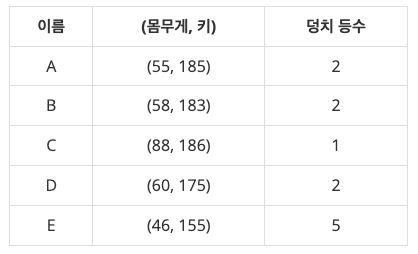

위 표에서 C보다 더 큰 덩치의 사람이 없으므로 C는 1등이 된다. 그리고 A, B, D 각각의 덩치보다 큰 사람은 C뿐이므로 이들은 모두 2등이 된다. 그리고 E보다 큰 덩치는 A, B, C, D 이렇게 4명이므로 E의 덩치는 5등이 된다. 위 경우에 3등과 4등은 존재하지 않는다. 여러분은 학생 N명의 몸무게와 키가 담긴 입력을 읽어서 각 사람의 덩치 등수를 계산하여 출력해야 한다.


- `입력` 첫 줄에는 전체 사람의 수 N이 주어진다. 그리고 이어지는 N개의 줄에는 각 사람의 몸무게와 키를 나타내는 양의 정수 x와 y가 하나의 공백을 두고 각각 나타난다.
    - ex) 5 `\n` 55 185 `\n` 58 183 `\n` 88 186 `\n` 60 175 `\n` 46 155


- `출력` 여러분은 입력에 나열된 사람의 덩치 등수를 구해서 그 순서대로 첫 줄에 출력해야 한다. 단, 각 덩치 등수는 공백문자로 분리되어야 한다.
    - ex) 2 2 1 2 5


- `제한` 2 ≤ N ≤ 50 / 10 ≤ x, y ≤ 200

In [50]:
# SOL 1) (72 ms)

N = int(input())
people = []
for _ in range(N):
    people.append(list(map(int, input().split())))

rank_list = []
for c in people:
    rank = 1
    for n in people:
        if (c[0] != n[0]) & (c[1] != n[1]): # 자신을 제외한 사람과 키, 몸무게 비교
            if (c[0] < n[0]) & (c[1] < n[1]):
                rank += 1
    rank_list.append(rank)
print(*rank_list)

5
55 185
58 183
88 186
60 175
46 155
2 2 1 2 5


In [47]:
# SOL 2) (72 ms)

N = int(input())
people = [list(map(int, input().split())) for _ in range(N)]

rank = [1] * N
for i in range(N):
    for j in range(N):
        if people[i][0] < people[j][0] and people[i][1] < people[j][1]:
            rank[i] += 1
            
print(*rank)

5
55 185
58 183
88 186
60 175
46 155
2 2 1 2 5


# 1018 체스판 다시 칠하기
- `문제` 지민이는 자신의 저택에서 MN개의 단위 정사각형으로 나누어져 있는 M×N 크기의 보드를 찾았다. 어떤 정사각형은 검은색으로 칠해져 있고, 나머지는 흰색으로 칠해져 있다. 지민이는 이 보드를 잘라서 8×8 크기의 체스판으로 만들려고 한다. 체스판은 검은색과 흰색이 번갈아서 칠해져 있어야 한다. 구체적으로, 각 칸이 검은색과 흰색 중 하나로 색칠되어 있고, 변을 공유하는 두 개의 사각형은 다른 색으로 칠해져 있어야 한다. 따라서 이 정의를 따르면 체스판을 색칠하는 경우는 두 가지뿐이다. 하나는 맨 왼쪽 위 칸이 흰색인 경우, 하나는 검은색인 경우이다. 보드가 체스판처럼 칠해져 있다는 보장이 없어서, 지민이는 8×8 크기의 체스판으로 잘라낸 후에 몇 개의 정사각형을 다시 칠해야겠다고 생각했다. 당연히 8*8 크기는 아무데서나 골라도 된다. 지민이가 다시 칠해야 하는 정사각형의 최소 개수를 구하는 프로그램을 작성하시오.


- `입력` 첫째 줄에 N과 M이 주어진다. N과 M은 8보다 크거나 같고, 50보다 작거나 같은 자연수이다. 둘째 줄부터 N개의 줄에는 보드의 각 행의 상태가 주어진다. B는 검은색이며, W는 흰색이다.
    - ex) 8 8 `\n` WBWBWBWB `\n` BWBWBWBW `\n` WBWBWBWB `\n` BWBBBWBW `\n` WBWBWBWB `\n` BWBWBWBW `\n` WBWBWBWB `\n` BWBWBWBW
    

- `출력` 첫째 줄에 지민이가 다시 칠해야 하는 정사각형 개수의 최솟값을 출력한다.
    - ex) 1

In [86]:
# SOL 1) 8x8로 자른 부분마다 compare_sum 적용하기 (108 ms)

# 입력받은 arr에 대해서 B, W로 시작하는 경우에 대해서 각각 잘못 칠해진 개수의 합을 구해서
# 두 경우의 합의 값 중에 더 작은 값을 return하는 함수 
def compare_sum(arr):
    base1 = [1, 0, 1, 0, 1, 0, 1, 0]
    base2 = [0, 1, 0, 1, 0, 1, 0, 1]
    error_1 = 0 # BWBWBWBWBW 먼저 비교
    error_2 = 0 # WBWBWBWBWB 먼저 비교
     
    for i in range(8):
        if i % 2 == 0:
            for j, c in enumerate(arr[i]):
                error_1 += abs(base1[j]-c)
        else:
            for k, c in enumerate(arr[i]):
                error_1 += abs(base2[k]-c)
                
    for i in range(8):
        if i % 2 == 0:
            for j, c in enumerate(arr[i]):
                error_2 += abs(base2[j]-c)
        else:
            for k, c in enumerate(arr[i]):
                error_2 += abs(base1[k]-c)
                
    return min(error_1, error_2)

N, M = map(int, input().split())
board = [list(map(int,(input().replace('B','1').replace('W','0')))) for _ in range(N)]

sum_list = []
for i in range(N-7):
    temp_row = []
    for j in board[i:i+8]: # 행 [0:8] [1:9] [2:10] ~ 
        temp_row.append(j)
    
    for col in range(M-7): 
        sub = []
        for k in range(len(temp_row)): # temp_row(8x8)에서 행별로 호출하기 위한 index 
            sub.append(temp_row[k][col:col+8])
        sum_list.append(compare_sum(sub))

print(min(sum_list))

10 13
BBBBBBBBWBWBW
BBBBBBBBBWBWB
BBBBBBBBWBWBW
BBBBBBBBBWBWB
BBBBBBBBWBWBW
BBBBBBBBBWBWB
BBBBBBBBWBWBW
BBBBBBBBBWBWB
WWWWWWWWWWBWB
WWWWWWWWWWBWB
12


In [ ]:
# SOL 2) (76 ms)

N, M = map(int, input().split())
board = [list(input().rstrip()) for _ in range(N)]
cnt_board = [[0]*M for _ in range(N)]

for i in range(N):
    for j in range(M):
        if (i+j)%2:
            if board[i][j] == 'B':
                cnt_board[i][j] = 1
        else:
            if board[i][j] == 'W':
                cnt_board[i][j] = 1
res = 64
for i in range(N-7):
    for j in range(M-7):
        total = 0
        for k in range(8):
            total += cnt_board[i+k][j:j+8].count(1)
        res = min(res, total, 64-total)
print(res)

# 1436 영화감독 숌
- `문제` 666은 종말을 나타내는 숫자라고 한다. 따라서, 많은 블록버스터 영화에서는 666이 들어간 제목을 많이 사용한다. 영화감독 숌은 세상의 종말 이라는 시리즈 영화의 감독이다. 조지 루카스는 스타워즈를 만들 때, 스타워즈 1, 스타워즈 2, 스타워즈 3, 스타워즈 4, 스타워즈 5, 스타워즈 6과 같이 이름을 지었고, 피터 잭슨은 반지의 제왕을 만들 때, 반지의 제왕 1, 반지의 제왕 2, 반지의 제왕 3과 같이 영화 제목을 지었다. 하지만 숌은 자신이 조지 루카스와 피터 잭슨을 뛰어넘는다는 것을 보여주기 위해서 영화 제목을 좀 다르게 만들기로 했다. 종말의 숫자란 어떤 수에 6이 적어도 3개이상 연속으로 들어가는 수를 말한다. 제일 작은 종말의 숫자는 666이고, 그 다음으로 큰 수는 1666, 2666, 3666, .... 과 같다. 따라서, 숌은 첫 번째 영화의 제목은 세상의 종말 666, 두 번째 영화의 제목은 세상의 종말 1666 이렇게 이름을 지을 것이다. 일반화해서 생각하면, N번째 영화의 제목은 세상의 종말 (N번째로 작은 종말의 숫자)와 같다.숌이 만든 N번째 영화의 제목에 들어간 숫자를 출력하는 프로그램을 작성하시오. 숌은 이 시리즈를 항상 차례대로 만들고, 다른 영화는 만들지 않는다.


- `입력` 첫째 줄에 숫자 N이 주어진다. N은 10,000보다 작거나 같은 자연수이다.
    - ex) 2 / 3 / 6 / 187 / 500


- `출력` 첫째 줄에 N번째 영화의 제목에 들어간 수를 출력한다.
    - ex) 1666 / 2666 / 5666 / 66666 / 166699

In [88]:
# SOL 1) (824 ms)

N = int(input())
num = 666
cnt = 0

while True:
    if '666' in str(num):
        cnt += 1
    if cnt == N:
        print(num)
        break
    num += 1

10000
2666799


In [89]:
# SOL 2) (768 ms)

N = int(input())
idx = 0

for i in range(2666800):
    if '666' in str(i):
        idx += 1
    if idx == N:
        print(i)
        break

10000
2666799
